In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing

cali=fetch_california_housing()
df= pd.DataFrame(cali.data, columns=cali.feature_names)
df['Price']=cali.target

In [7]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [30]:
dataset=pd.DataFrame(df.head())
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
X=df
Y=cali.target

In [34]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965
...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.292
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.978
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.221
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.835


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

regression=LinearRegression()
regression.fit(X_train,Y_train)

#performing cross validation
mse_score= cross_val_score(regression, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)
mean_mse=np.mean(mse_score)
print("Mean MSE from Cross Validation:", mean_mse)

Mean MSE from Cross Validation: -1.3079604663537614e-30


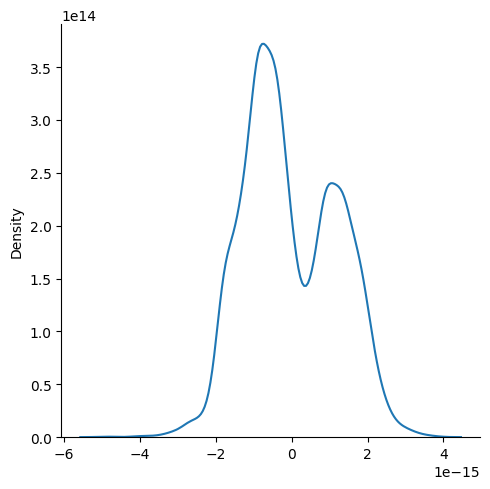

In [42]:
import seaborn as sns
reg_pred=regression.predict(X_test)
sns.displot(reg_pred-Y_test, kind="kde")
plt.show()

In [43]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred, Y_test)
print(f"R-Squared Score:{score}")


R-Squared Score:1.0
